## Bike Dataset for MultiLinear Regression Using Bayesian Modeling

In [1]:
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az
import seaborn as sns
import matplotlib.pyplot as plt

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
data = pd.read_csv("bike_sharing_dataset/day.csv")
data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [4]:
data_hour = pd.read_csv("bike_sharing_dataset/hour.csv")
data_hour.head(20)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [125]:
data_hour["season"].value_counts()

season
3    4496
2    4409
1    4242
4    4232
Name: count, dtype: int64

<Axes: xlabel='temp', ylabel='cnt'>

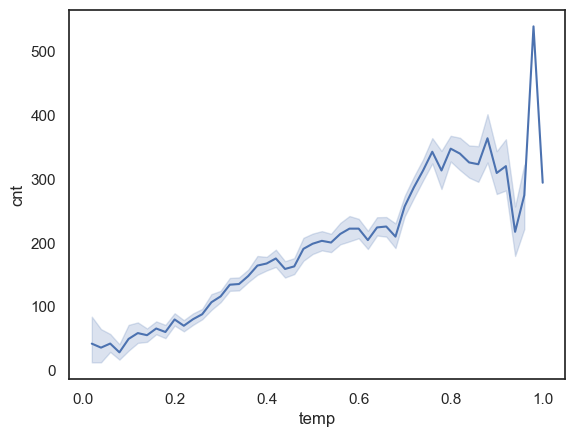

In [66]:
sns.lineplot(x=data_hour["temp"], y=data_hour["cnt"])

<Axes: xlabel='hum', ylabel='cnt'>

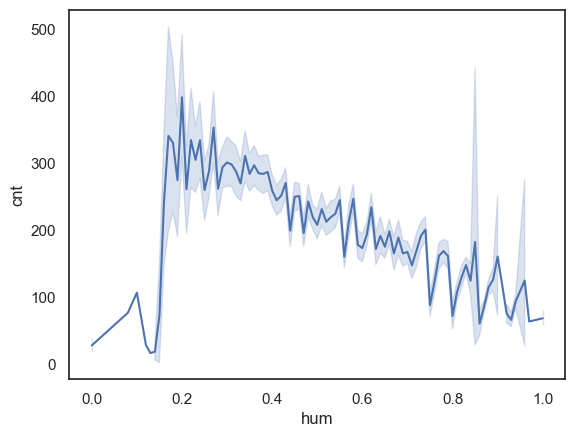

In [67]:
sns.lineplot(x=data_hour["hum"], y=data_hour["cnt"])

<Axes: xlabel='temp', ylabel='hum'>

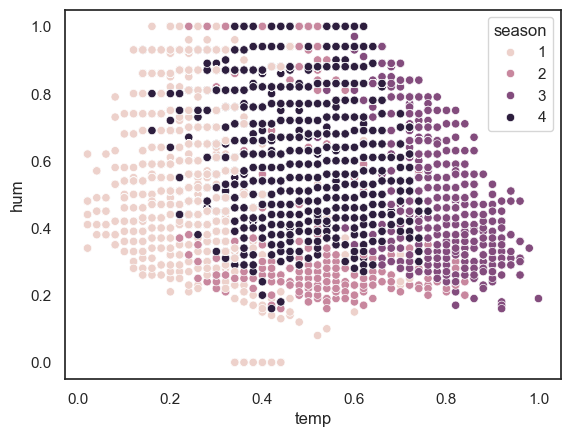

In [128]:
sns.scatterplot(x="temp", y="hum", data=data_hour, hue="season")

In [10]:
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [20]:
import pandas as pd

instant = 16000

# Faça o split com base na data
data_hour_train = data_hour[data_hour['instant'] < instant]
data_hour_test = data_hour[data_hour['instant'] >= instant]

data_hour_train.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [21]:
data_hour_test.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
15999,16000,2012-11-04,4,1,11,8,0,0,0,1,0.30,0.3030,0.56,0.1343,34,115,149
16000,16001,2012-11-04,4,1,11,9,0,0,0,1,0.32,0.3333,0.53,0.0000,56,161,217
16001,16002,2012-11-04,4,1,11,10,0,0,0,1,0.34,0.3333,0.49,0.1940,73,287,360
16002,16003,2012-11-04,4,1,11,11,0,0,0,1,0.38,0.3939,0.46,0.2239,134,311,445
16003,16004,2012-11-04,4,1,11,12,0,0,0,1,0.38,0.3939,0.46,0.2239,150,354,504


In [22]:
data_hour_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15999 entries, 0 to 15998
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15999 non-null  int64  
 1   dteday      15999 non-null  object 
 2   season      15999 non-null  int64  
 3   yr          15999 non-null  int64  
 4   mnth        15999 non-null  int64  
 5   hr          15999 non-null  int64  
 6   holiday     15999 non-null  int64  
 7   weekday     15999 non-null  int64  
 8   workingday  15999 non-null  int64  
 9   weathersit  15999 non-null  int64  
 10  temp        15999 non-null  float64
 11  atemp       15999 non-null  float64
 12  hum         15999 non-null  float64
 13  windspeed   15999 non-null  float64
 14  casual      15999 non-null  int64  
 15  registered  15999 non-null  int64  
 16  cnt         15999 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.2+ MB


In [23]:
data_hour_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1380 entries, 15999 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     1380 non-null   int64  
 1   dteday      1380 non-null   object 
 2   season      1380 non-null   int64  
 3   yr          1380 non-null   int64  
 4   mnth        1380 non-null   int64  
 5   hr          1380 non-null   int64  
 6   holiday     1380 non-null   int64  
 7   weekday     1380 non-null   int64  
 8   workingday  1380 non-null   int64  
 9   weathersit  1380 non-null   int64  
 10  temp        1380 non-null   float64
 11  atemp       1380 non-null   float64
 12  hum         1380 non-null   float64
 13  windspeed   1380 non-null   float64
 14  casual      1380 non-null   int64  
 15  registered  1380 non-null   int64  
 16  cnt         1380 non-null   int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 194.1+ KB


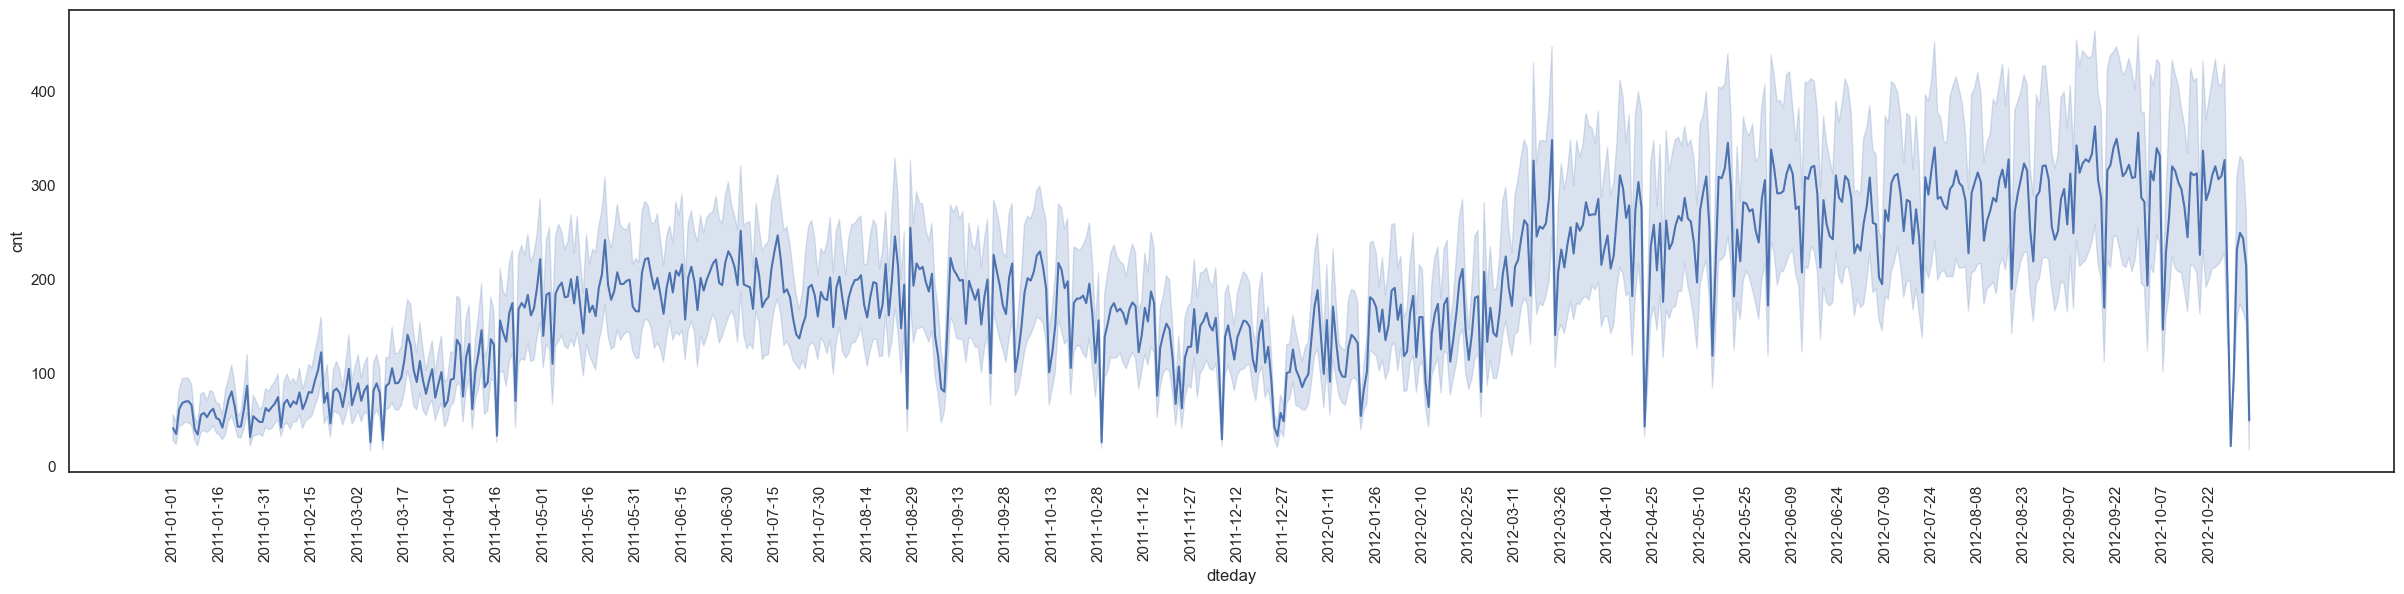

In [24]:
sns.set(style="white")
plt.figure(figsize=(30,6))

sns.lineplot(data=data_hour_train, x="dteday", y="cnt")
plt.xticks(ticks=range(0, 731, 15) , rotation=90)
plt.show()

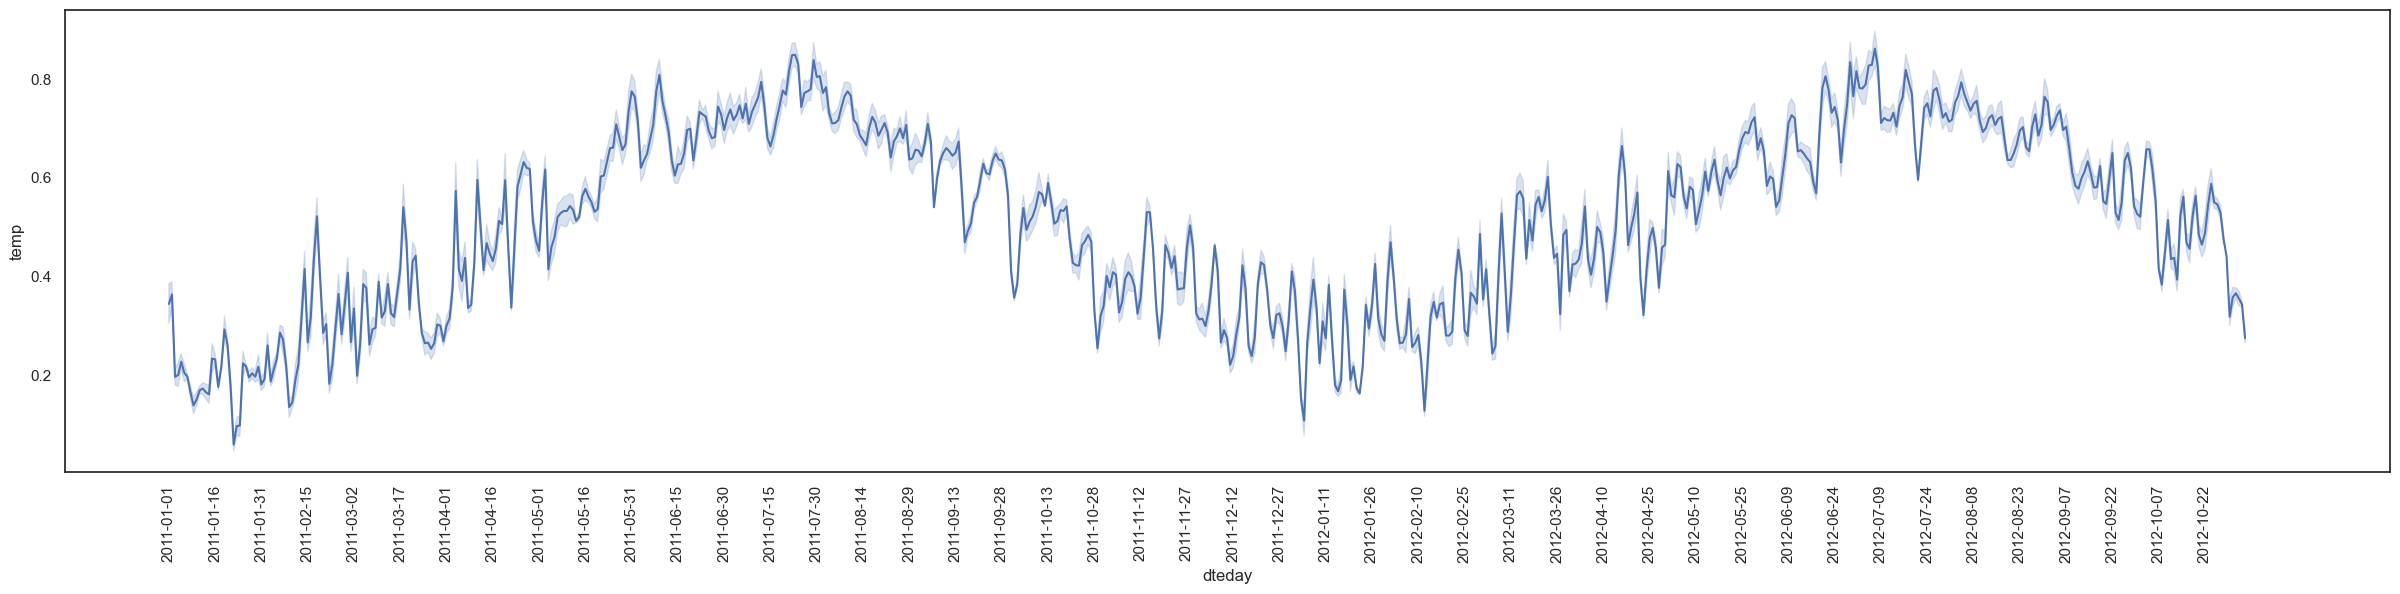

In [25]:
sns.set(style="white")
plt.figure(figsize=(30,6))

sns.lineplot(data=data_hour_train, x="dteday", y="temp")
plt.xticks(ticks=range(0, 731, 15) , rotation=90)
plt.show()

<Axes: xlabel='temp', ylabel='Count'>

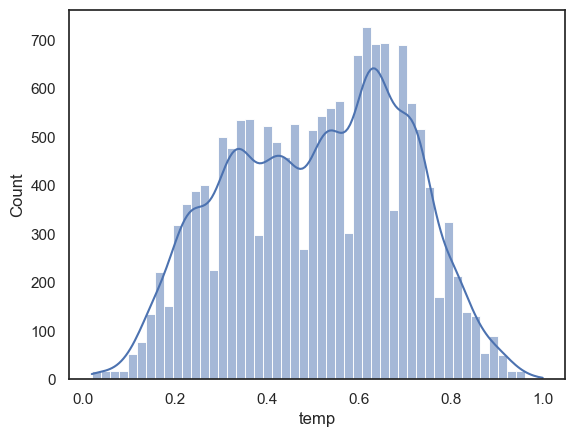

In [26]:
sns.histplot(data_hour_train, x="temp", bins=50, kde=True)

<Axes: xlabel='hum', ylabel='Count'>

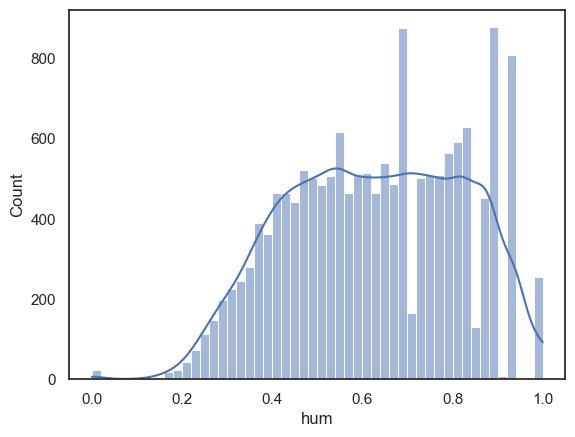

In [27]:
sns.histplot(data_hour_train, x="hum", bins=50, kde=True)

<Axes: xlabel='cnt', ylabel='Count'>

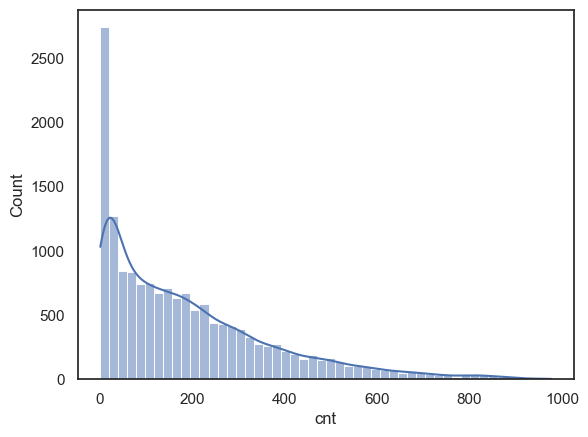

In [28]:
sns.histplot(data_hour_train, x="cnt", bins=50, kde=True)

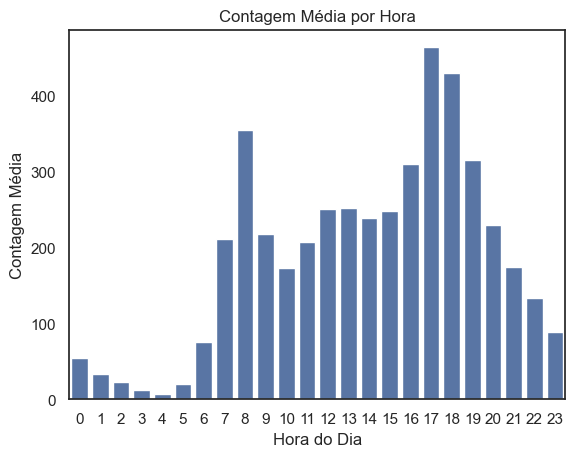

In [30]:
# Calcula a média por hora
hourly_avg = data_hour_train.groupby("hr")["cnt"].mean().reset_index()

# Plota o gráfico de barras
sns.barplot(data=hourly_avg, x="hr", y="cnt")
plt.xlabel("Hora do Dia")
plt.ylabel("Contagem Média")
plt.title("Contagem Média por Hora")
plt.show()

In [ ]:
# Defining the model within the context of a PyMC3 model.
with pm.Model() as model_mlb:

    # Prior for the intercept term (alfa). It follows a Normal distribution with mean 0 and standard deviation 1.
    alfa = pm.Normal("alfa", mu=0, sigma=10)
    
    # Prior for the coefficient of temperature (beta_0). It follows a Normal distribution with mean 0 and standard deviation 10.
    beta_0 = pm.Normal("beta_0", mu=0, sigma=10)
    
    # Prior for the coefficient of humidity (beta_1). It also follows a Normal distribution with mean 0 and standard deviation 10.
    beta_1 = pm.Normal("beta_1", mu=0, sigma=10)
    
    # Prior for the standard deviation (sigma). It follows a HalfNormal distribution with standard deviation 10.
    sigma = pm.HalfNormal("sigma", 10) # HalfNormal is typically used for parameters that represent standard deviations or other positive values.
    
    # The expected value (mu) is modeled deterministically as an exponential function of the intercept (alfa) and the linear combination of temperature and humidity (beta_0 * temp + beta_1 * hum).
    mu = pm.Deterministic("mu", pm.math.exp(alfa + beta_0 * data_hour_train.temp + beta_1 * data_hour_train.hum)) # This is done to model a non-linear relationship between the input variables (temp, hum) and the outcome.

    # The observed data is modeled as coming from a Negative Binomial distribution.
    # The mean (mu) of the Negative Binomial is set to the deterministic variable 'mu', and the 'alpha' parameter (a shape parameter of the Negative Binomial) is set to 'sigma'.
    # The 'observed' argument is the actual data for the count (data_hour_train.cnt).
    _ = pm.NegativeBinomial("y_pred", mu=mu, alpha=sigma, observed=data_hour_train.cnt)
    
    # The model is sampled using the default MCMC sampling method (No-U-Turn Sampler, NUTS), which will generate posterior samples for the parameters based on the observed data.
    idata_mlb = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alfa, beta_0, beta_1, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 890 seconds.


In [ ]:
import dill

# Salvar o modelo completo
# O QUE ENTREGA:
# - A estrutura completa do modelo, incluindo definições das variáveis, distribuições e o gráfico computacional.
# - NÃO salva os resultados das amostras (posteriores geradas pela inferência).
with open("models/model_mlb.pkl", "wb") as f:
    dill.dump(model_mlb, f)

In [148]:
# Carregar o modelo completo
# O QUE ENTREGA:
# - Restaura o modelo para que você possa rodar inferências futuras (pm.sample()) ou modificá-lo.
# - NÃO contém as amostras ou resultados da inferência.
with open("models/model_mlb.pkl", "rb") as f:
    model_mlb_loaded = dill.load(f)

In [ ]:
import arviz as az

# Salvar os resultados da inferência
# O QUE ENTREGA:
# - As amostras geradas pelo algoritmo MCMC, incluindo:
#   * Distribuições posteriores das variáveis.
#   * Estatísticas como médias, desvios padrão e intervalos de confiança.
# - NÃO salva a estrutura do modelo ou as definições das variáveis.
az.to_netcdf(idata_mlb, "models/model_mlb_inference.nc")

'models/model_mlb_inference_3.nc'

In [149]:
# Carregar os resultados da inferência
# O QUE ENTREGA:
# - Permite acessar as distribuições posteriores e gerar análises (gráficos, estatísticas, etc.).
# - NÃO contém a estrutura do modelo; você precisará dela para rodar novas inferências.
idata_mlb_loaded = az.from_netcdf("models/model_mlb_inference.nc")

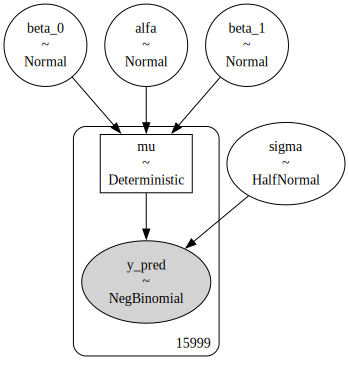

In [110]:
pm.model_to_graphviz(model_mlb_loaded)

In [111]:
az.summary(idata_mlb_loaded, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alfa,4.85,0.04,4.78,4.92,0.00,0.00,1810.02,2072.09,1.0
beta_0,2.29,0.04,2.20,2.37,0.00,0.00,2219.93,2143.51,1.0
beta_1,-1.45,0.04,-1.53,-1.38,0.00,0.00,2308.67,2216.17,1.0
sigma,1.03,0.01,1.01,1.05,0.00,0.00,3469.42,2434.09,1.0
mu[0],68.31,1.07,66.27,70.22,0.02,0.01,3344.34,2738.98,1.0
...,...,...,...,...,...,...,...,...,...
mu[15994],100.07,1.29,97.63,102.41,0.03,0.02,2558.66,2730.61,1.0
mu[15995],90.21,1.22,88.02,92.53,0.02,0.02,2703.31,3111.08,1.0
mu[15996],90.21,1.22,88.02,92.53,0.02,0.02,2703.31,3111.08,1.0
mu[15997],100.07,1.29,97.63,102.41,0.03,0.02,2558.66,2730.61,1.0


In [152]:
idata_mlb_loaded

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [129]:
with model_mlb_loaded:
    pp = pm.sample_posterior_predictive(idata_mlb_loaded, extend_inferencedata=True)

Sampling: [y_pred]


<Axes: xlabel='y_pred'>

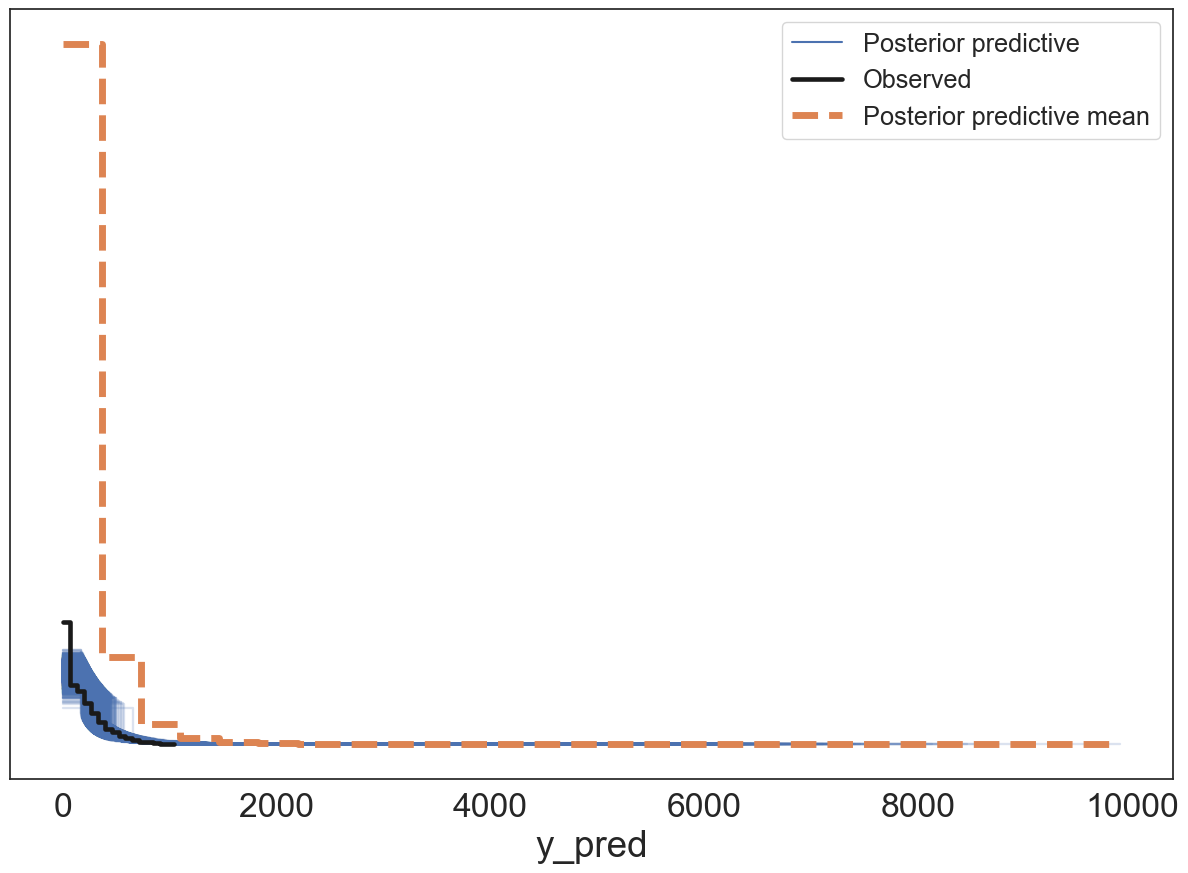

In [131]:
#az.plot_ppc(idata_mlb_loaded, num_pp_samples=200, alpha=0.1, figsize=(20, 10), backend="bokeh")
az.plot_ppc(pp, figsize=(15, 10))

### Fazendo previsões:

In [117]:
data_hour_test.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
15999,16000,2012-11-04,4,1,11,8,0,0,0,1,0.30,0.3030,0.56,0.1343,34,115,149
16000,16001,2012-11-04,4,1,11,9,0,0,0,1,0.32,0.3333,0.53,0.0000,56,161,217
16001,16002,2012-11-04,4,1,11,10,0,0,0,1,0.34,0.3333,0.49,0.1940,73,287,360
16002,16003,2012-11-04,4,1,11,11,0,0,0,1,0.38,0.3939,0.46,0.2239,134,311,445
16003,16004,2012-11-04,4,1,11,12,0,0,0,1,0.38,0.3939,0.46,0.2239,150,354,504


In [134]:
data_to_predict = data_hour_test[["temp", "hum"]]
true_value = data_hour_test[["cnt"]]
data_to_predict.head()

,temp,hum
15999,0.30,0.56
16000,0.32,0.53
16001,0.34,0.49
16002,0.38,0.46
16003,0.38,0.46


In [135]:
true_value.head()

,cnt
15999,149
16000,217
16001,360
16002,445
16003,504


In [136]:
data_hour_test

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
15999,16000,2012-11-04,4,1,11,8,0,0,0,1,0.30,0.3030,0.56,0.1343,34,115,149
16000,16001,2012-11-04,4,1,11,9,0,0,0,1,0.32,0.3333,0.53,0.0000,56,161,217
16001,16002,2012-11-04,4,1,11,10,0,0,0,1,0.34,0.3333,0.49,0.1940,73,287,360
16002,16003,2012-11-04,4,1,11,11,0,0,0,1,0.38,0.3939,0.46,0.2239,134,311,445
16003,16004,2012-11-04,4,1,11,12,0,0,0,1,0.38,0.3939,0.46,0.2239,150,354,504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [ ]:
# Dados de teste
temp_test = data_hour_test.temp.values
hum_test = data_hour_test.hum.values
true_value = data_hour_test[["cnt"]]

# Previsão para os dados de teste
with model_mlb_loaded:
    pm.set_data({"temp": temp_test, "hum": hum_test, "cnt": true_value})  
    
    posterior_predictive = pm.sample_posterior_predictive(idata_mlb_loaded, predictions=True)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_true = data_hour_test.cnt.values

# Calcular métricas
mae = mean_absolute_error(y_true, y_pred_mean)
mse = mean_squared_error(y_true, y_pred_mean)
r2 = r2_score(y_true, y_pred_mean)

print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, R2: {r2:.2f}")

In [103]:
print("Tamanho de y_true:", len(y_true))
print("Tamanho de y_pred_mean:", len(y_pred_mean))

Tamanho de y_true: 1380
Tamanho de y_pred_mean: 15999


array([[<Axes: title={'center': 'alfa'}>,
        <Axes: title={'center': 'alfa'}>],
       [<Axes: title={'center': 'beta_0'}>,
        <Axes: title={'center': 'beta_0'}>],
       [<Axes: title={'center': 'beta_1'}>,
        <Axes: title={'center': 'beta_1'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>],
       [<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>]],
      dtype=object)

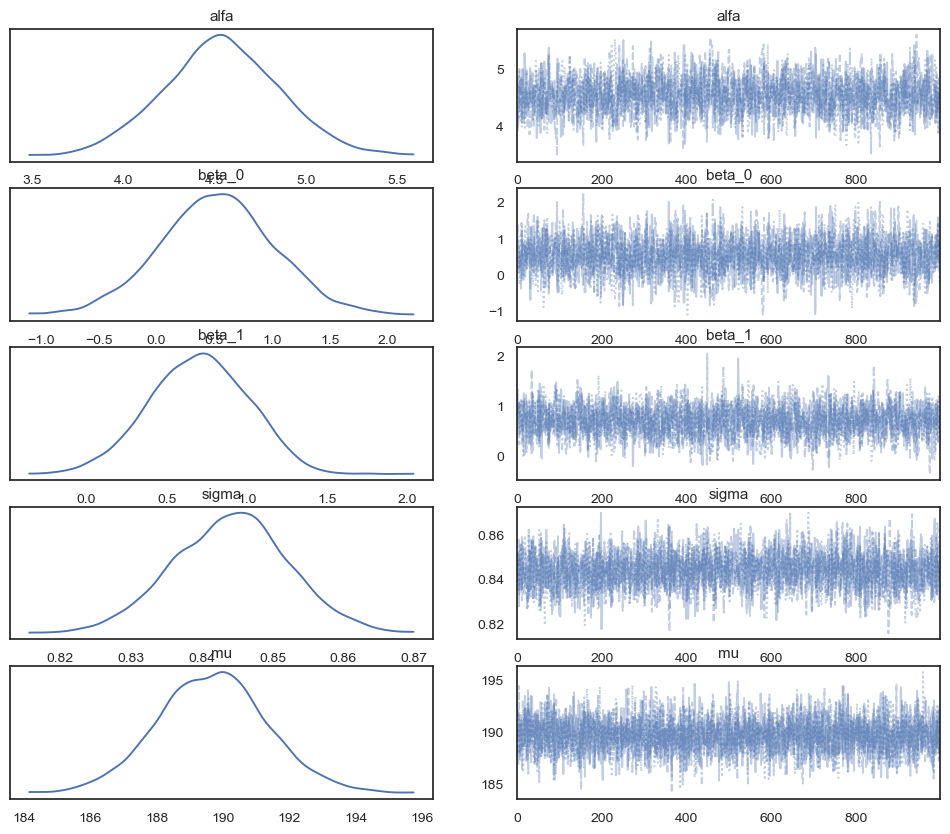

In [107]:
az.plot_trace(idata_mlb, combined=True)

array([[<Axes: title={'center': 'alfa'}>,
        <Axes: title={'center': 'alfa'}>],
       [<Axes: title={'center': 'beta_0'}>,
        <Axes: title={'center': 'beta_0'}>],
       [<Axes: title={'center': 'beta_1'}>,
        <Axes: title={'center': 'beta_1'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>],
       [<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>]],
      dtype=object)

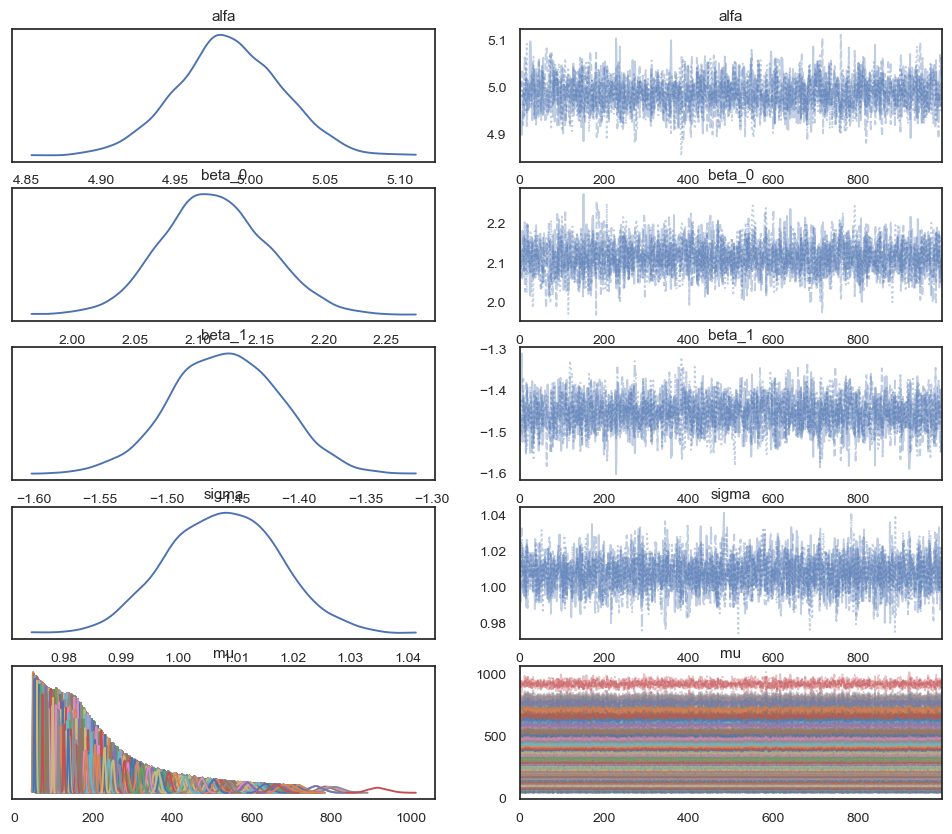

In [80]:
az.plot_trace(idata_mlb, combined=True)